# Exoplanet Hunting in Deep Space
### By Ali J. Shannon
In this module, I look at time series data provided by Kepler space telescope.

The fields are explained here:

1. `LABEL` uses either 1 or 2, 1 means the star has no orbiting planet, 2 means it does.

2. `FLUX 1 : 3192` are the light intensity data retreived from a planet over some time interval.

I intend to analyze the plots then write a predictor that will understand the relationships between light intensity values and determine whether or not the star has an orbiting planet. 

For our purposes, we will assume that there are only two types of stars, ones with orbiting planets and ones with none.

### Acknowledgments

Data is retreived from **[Kaggle](https://www.kaggle.com/keplersmachines/kepler-labelled-time-series-data/home)**, check out their publicly available datasets for machine learning and data analysis.

In [1]:
import pandas as pd
import scipy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

df = pd.read_csv('exoTrain.csv')

In [2]:
labels = df['LABEL']
df.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


### Data visualization

This will display some statistics for the data sets. Blues are 1 and Reds are 2

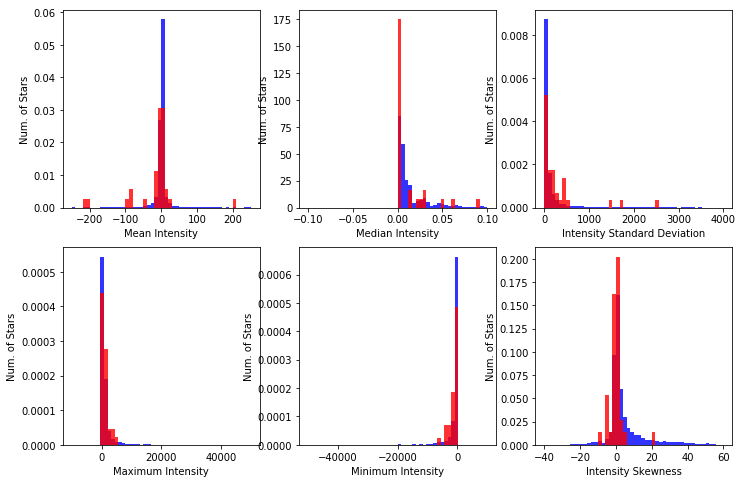

In [3]:
def stats_plots(df):
    """
    This function finds the mean, standard deviations (std), skew, min/max, and median for both types of stars.
    """
    means1 = df[labels==1].mean(axis=1)
    medians1 = df[labels==1].median(axis=1)
    std1 = df[labels==1].std(axis=1)
    maxval1 = df[labels==1].max(axis=1)
    minval1 = df[labels==1].min(axis=1)
    skew1 = df[labels==1].skew(axis=1)
    means2 = df[labels==2].mean(axis=1)
    medians2 = df[labels==2].median(axis=1)
    std2 = df[labels==2].std(axis=1)
    maxval2 = df[labels==2].max(axis=1)
    minval2 = df[labels==2].min(axis=1)
    skew2 = df[labels==2].skew(axis=1)
    
    # plot each category
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(231)
    ax.hist(means1,alpha=0.8,bins=50,color='b',normed=True,range=(-250,250))
    ax.hist(means2,alpha=0.8,bins=50,color='r',normed=True,range=(-250,250))
    ax.get_legend()
    ax.set_xlabel('Mean Intensity')
    ax.set_ylabel('Num. of Stars')
    ax = fig.add_subplot(232)
    ax.hist(medians1,alpha=0.8,bins=50,color='b',normed=True,range=(-0.1,0.1))
    ax.hist(medians2,alpha=0.8,bins=50,color='r',normed=True,range=(-0.1,0.1))
    ax.get_legend()

    ax.set_xlabel('Median Intensity')
    ax.set_ylabel('Num. of Stars')
    ax = fig.add_subplot(233)    
    ax.hist(std1,alpha=0.8,bins=50,normed=True,color='b',range=(0,4000))
    ax.hist(std2,alpha=0.8,bins=50,normed=True,color='r',range=(0,4000))
    ax.get_legend()

    ax.set_xlabel('Intensity Standard Deviation')
    ax.set_ylabel('Num. of Stars')
    ax = fig.add_subplot(234)
    ax.hist(maxval1,alpha=0.8,bins=50,normed=True,color='b',range=(-10000,50000))
    ax.hist(maxval2,alpha=0.8,bins=50,normed=True,color='r',range=(-10000,50000))
    ax.get_legend()

    ax.set_xlabel('Maximum Intensity')
    ax.set_ylabel('Num. of Stars')
    ax = fig.add_subplot(235)
    ax.hist(minval1,alpha=0.8,bins=50,normed=True,color='b',range=(-50000,10000))
    ax.hist(minval2,alpha=0.8,bins=50,normed=True,color='r',range=(-50000,10000))
    ax.get_legend()

    ax.set_xlabel('Minimum Intensity')
    ax.set_ylabel('Num. of Stars')
    ax = fig.add_subplot(236)
    ax.hist(skew1,alpha=0.8,bins=50,normed=True,color='b',range=(-40,60))
    ax.hist(skew2,alpha=0.8,bins=50,normed=True,color='r',range=(-40,60)) 
    ax.get_legend()

    ax.set_xlabel('Intensity Skewness')
    ax.set_ylabel('Num. of Stars')

# Hide warnings, only show errors
import warnings
warnings.filterwarnings("ignore")


stats_plots(df)
plt.show()

There is an an obvious difference, especially if we look at the median intensity plot.

In [4]:
df[labels==1].median(axis=1).describe()

count    5050.000000
mean        0.044806
std         0.108335
min         0.000000
25%         0.000000
50%         0.005000
75%         0.025000
max         0.500000
dtype: float64

In [5]:
df[labels==2].median(axis=1).describe()

count    37.000000
mean     -0.060676
std       0.990626
min      -5.510000
25%       0.000000
50%       0.000000
75%       0.030000
max       1.545000
dtype: float64

### Time varying data analysis.

This will sample out 12 stars of each category and plot the intensities over time.

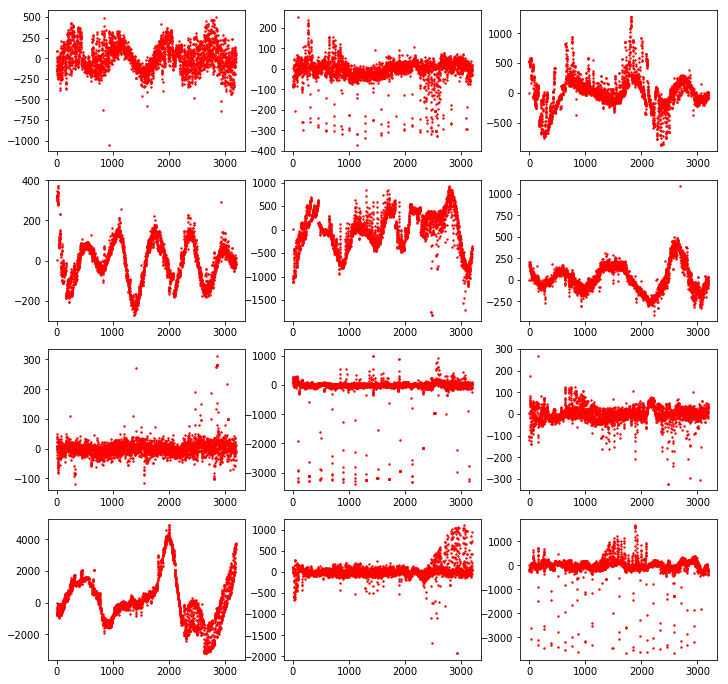

In [6]:
fig = plt.figure(figsize=(12,40))
t = np.array(range(3198))
for i in range(12):
    ax = fig.add_subplot(13,3,i+1)
    ax.scatter(t,df[labels==2].iloc[i,:], s =2, c = 'red')

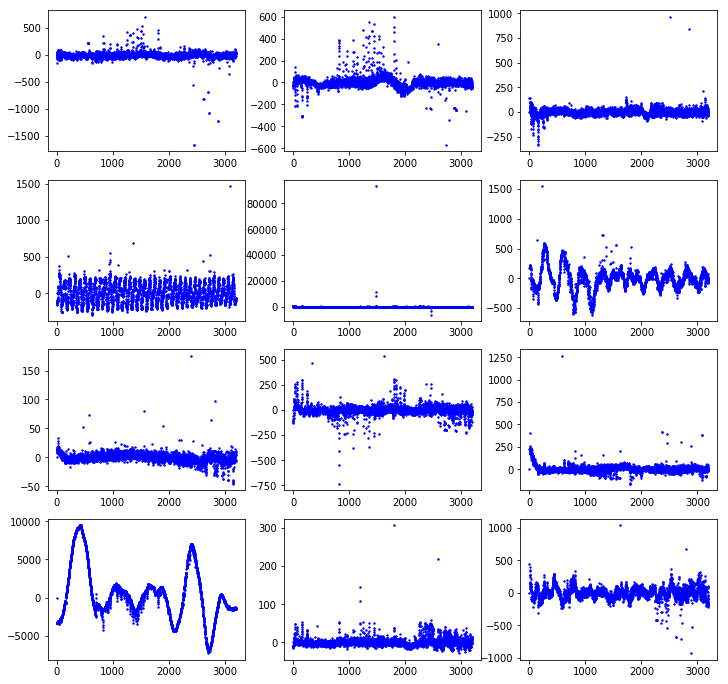

In [7]:
fig = plt.figure(figsize=(12,40))
t = np.array(range(3198))
for i in range(12):
    ax = fig.add_subplot(13,3,i+1)
    ax.scatter(t,df[labels==1].iloc[i,:], s = 2, c = 'blue')

### Machine learning
Here I will work with scikit-learn libraries and print the prediction accuracy using the testing file `exoTest.csv` which will be uploaded with this document.

In [8]:
X = df.drop(['LABEL'], axis = 1)
y = df['LABEL']

# import testing data
test = pd.read_csv('exoTest.csv')
X_test = test.drop(['LABEL'], axis = 1)
y_test = test['LABEL']

In [9]:
# this is Decision Tree Classifier method
from sklearn import tree

decTree = tree.DecisionTreeClassifier().fit(X,y)

# this is to check the accuracy versus data it has never seen before
from sklearn.metrics import accuracy_score

decTree_score = accuracy_score(y_test, decTree.predict(X_test))

print('Accuracy using Decision Tree Classifier is nearly ' + f'{decTree_score *100} %')

Accuracy using Decision Tree Classifier is nearly 98.24561403508771 %


In [10]:
# this is the infamous Support Vector Machine, should give similar results to the next one
from sklearn import svm

clf = svm.SVC(gamma='scale').fit(X, y)

clf_score = accuracy_score(y_test, clf.predict(X_test))

print('Accuracy using Support Vector Machine is nearly ' + f'{clf_score *100} %')

Accuracy using Support Vector Machine is nearly 99.12280701754386 %


In [11]:
# This is the KNN or K-Nearest-Neighbors which gives the same accuracy as the 
from sklearn.neighbors import KNeighborsClassifier

# leave it at the default k=5
neigh = KNeighborsClassifier().fit(X,y)

neigh_score = accuracy_score(y_test, neigh.predict(X_test))

print('Accuracy using K-Nearest-Neighbors (k = 5) is nearly ' + f'{neigh_score *100} %')

Accuracy using K-Nearest-Neighbors (k = 5) is nearly 99.12280701754386 %


In [12]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier().fit(X, y)

rfc_score = accuracy_score(y_test, rfc.predict(X_test))

print('Accuracy using Random Forest Classifier is nearly ' + f'{rfc_score *100} %')

Accuracy using Random Forest Classifier is nearly 99.12280701754386 %


### Summary

We can predict the accuracy of exoplanets up to 99% which is close to perfection!

Next step is maybe see how fast a planet is orbiting a planet or how large is it. This will be a future project